In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pd.set_option('display.max_columns',None)

In [2]:
# with open('../prep-data/Ames_Housing_Feature_Description.txt','r') as f: 
#     print(f.read())

In [3]:
df = pd.read_csv('../prep-data/Ames_outliers_removed.csv')

In [4]:
df.head()
# we removed 3 rows

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
df = df.drop('PID',axis=1)

In [6]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [8]:
df.isnull().sum() / len(df) * 100

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [33]:
def percent_missing(df): 
    percent_nan = df.isnull().sum() / len(df) * 100
    percent_nan = percent_nan[percent_nan>0].sort_values()
    
    return percent_nan

In [10]:
percent_nan = percent_missing(df)

In [11]:
percent_nan
# for pool quality: (a) either the data was not collected or nan is an endication wether or not the house has a pool

Pool QC           99.590024
Misc Feature      96.412709
Alley             93.235395
Fence             80.457807
Fireplace Qu      48.582166
Lot Frontage      16.740690
Garage Yr Blt      5.432183
Garage Cond        5.432183
Garage Qual        5.432183
Garage Finish      5.432183
Garage Type        5.363854
Bsmt Exposure      2.835668
BsmtFin Type 2     2.767339
Bsmt Cond          2.733174
Bsmt Qual          2.733174
BsmtFin Type 1     2.733174
Mas Vnr Type       0.785787
Mas Vnr Area       0.785787
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
Garage Cars        0.034165
BsmtFin SF 2       0.034165
BsmtFin SF 1       0.034165
Bsmt Unf SF        0.034165
Total Bsmt SF      0.034165
Garage Area        0.034165
Electrical         0.034165
dtype: float64

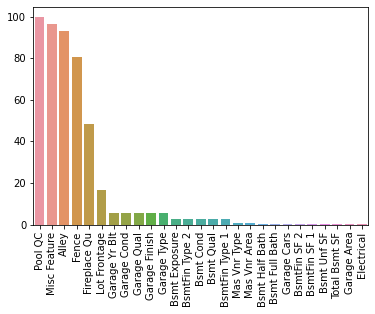

In [12]:
# plt.figure(figsize=(10,8))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

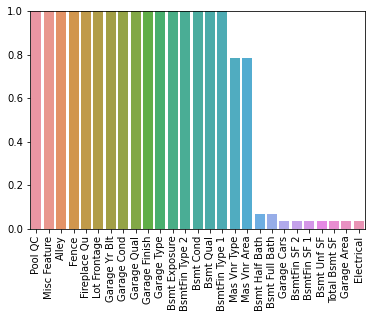

In [13]:
# plt.figure(figsize=(10,8))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1);

# we might want to drop rows that are missing these data features (they constitute less than 1% of our data). First, we have to determine a threshold to begin to drop rows. 

In [14]:
percent_nan[percent_nan < 1]

Mas Vnr Type      0.785787
Mas Vnr Area      0.785787
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
Garage Cars       0.034165
BsmtFin SF 2      0.034165
BsmtFin SF 1      0.034165
Bsmt Unf SF       0.034165
Total Bsmt SF     0.034165
Garage Area       0.034165
Electrical        0.034165
dtype: float64

In [15]:
0.034165 * len(df) / 100
# only one (two or three) rows are missing these feature values

1.0000095500000001

In [16]:
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1576,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [17]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [18]:
df = df.dropna(axis=0, subset=['Electrical','Garage Area'])

In [19]:
percent_nan = percent_missing(df)

In [20]:
percent_nan[percent_nan < 1]

Mas Vnr Area      0.786325
Mas Vnr Type      0.786325
Bsmt Half Bath    0.068376
Bsmt Full Bath    0.068376
BsmtFin SF 1      0.034188
BsmtFin SF 2      0.034188
Total Bsmt SF     0.034188
Bsmt Unf SF       0.034188
dtype: float64

In [21]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [22]:
df[df['Bsmt Full Bath'].isnull()]
# note that is the same two rows; it's very likely that these two houses simply did not have a basement

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [23]:
# BSMT NUMERIC COLUMNS -> fillna with 0
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

# BSMT STRING COLUMNS -> fillna with 'None'
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [31]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


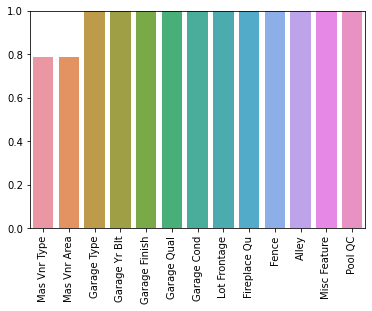

In [34]:
percent_nan = percent_missing(df)

# plt.figure(figsize=(10,8))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1);

In [35]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [38]:
percent_nan = percent_missing(df)

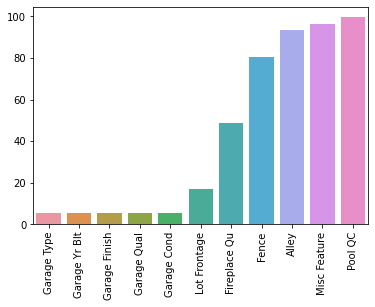

In [40]:
# plt.figure(figsize=(10,8))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [43]:
# replace NaN values with the category 'None' and zero values

gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)
# an alternative would be to fill in mising values with the average date a garage was built 

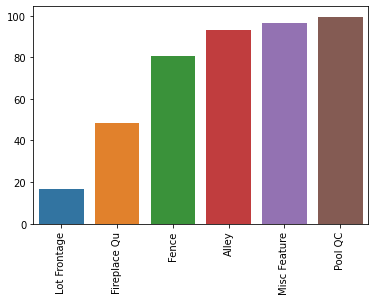

In [42]:
percent_nan = percent_missing(df)

# plt.figure(figsize=(10,8))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [44]:
percent_nan

Lot Frontage    16.752137
Fireplace Qu    48.547009
Fence           80.478632
Alley           93.230769
Misc Feature    96.410256
Pool QC         99.589744
dtype: float64

In [47]:
df = df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence'], axis=1)

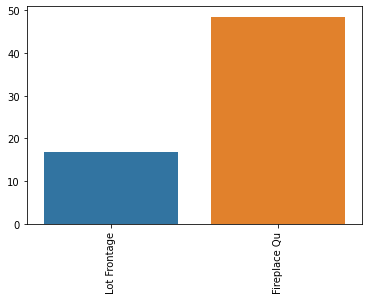

In [48]:
percent_nan = percent_missing(df)

# plt.figure(figsize=(10,8))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [49]:
percent_nan

Lot Frontage    16.752137
Fireplace Qu    48.547009
dtype: float64

In [50]:
df['Fireplace Qu'].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [51]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

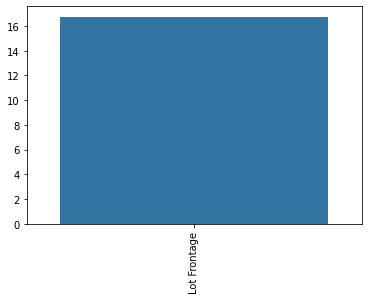

In [52]:
percent_nan = percent_missing(df)

# plt.figure(figsize=(10,8))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [53]:
df['Lot Frontage'].value_counts()
# note that this is numerical data! Missing values should be filled in based on some stastical estimation. 

60.0     276
80.0     137
70.0     133
50.0     116
75.0     105
        ... 
22.0       1
136.0      1
144.0      1
28.0       1
141.0      1
Name: Lot Frontage, Length: 128, dtype: int64

In [56]:
df.corr()['Lot Frontage'].sort_values()

MS SubClass       -0.430521
Overall Cond      -0.072866
Bsmt Half Bath    -0.028655
Yr Sold           -0.007396
Low Qual Fin SF    0.006049
Kitchen AbvGr      0.006890
Misc Val           0.014022
Mo Sold            0.016471
Enclosed Porch     0.016562
2nd Flr SF         0.021647
3Ssn Porch         0.029928
Half Bath          0.034289
BsmtFin SF 2       0.048845
Screen Porch       0.080470
Year Remod/Add     0.087098
Bsmt Full Bath     0.094725
Garage Yr Blt      0.103244
Wood Deck SF       0.114204
Year Built         0.116581
Bsmt Unf SF        0.118046
Pool Area          0.125000
Open Porch SF      0.141202
BsmtFin SF 1       0.165814
Full Bath          0.182655
Overall Qual       0.200698
Mas Vnr Area       0.201185
Fireplaces         0.244824
Bedroom AbvGr      0.246874
Garage Cars        0.312195
Total Bsmt SF      0.312418
TotRms AbvGrd      0.341440
Garage Area        0.345994
Gr Liv Area        0.355336
SalePrice          0.367518
1st Flr SF         0.432625
Lot Area           0

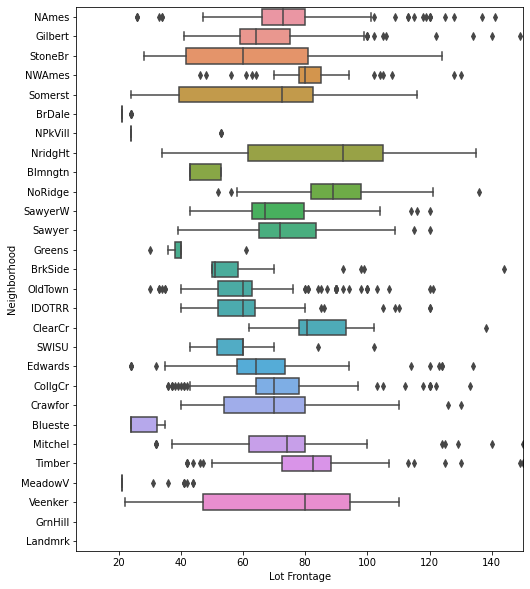

In [63]:
plt.figure(figsize=(8,10))
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h')
plt.xlim(right=150);

# we're going to fill in lot frontage NaN values with the average lot fontage within the Neighborhood 

In [64]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [67]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda lf: lf.fillna(lf.mean()))

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2922     37.000000
2923     75.144444
2924     62.000000
2925     77.000000
2926     74.000000
Name: Lot Frontage, Length: 2925, dtype: float64

In [68]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda lf: lf.fillna(lf.mean()))

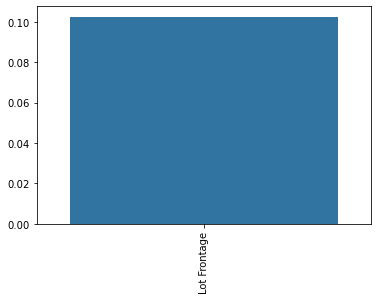

In [69]:
percent_nan = percent_missing(df)

# plt.figure(figsize=(10,8))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [103]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [86]:
df[df.isnull().any(axis=1)]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2253,120,RM,NaN,9763,Pave,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1998,1998,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,239.0,Gd,TA,PConc,Gd,TA,No,GLQ,1102.0,ALQ,72.0,328.0,1502.0,GasA,Ex,Y,SBrkr,1502,0,0,1502,1.0,0.0,1,1,1,1,Gd,5,Typ,1,TA,Attchd,1998.0,Fin,1.0,286.0,TA,TA,Y,0,0,0,0,0,0,0,9,2007,WD,Normal,330000
2785,160,RH,NaN,3612,Pave,IR1,Lvl,AllPub,Inside,Gtl,Landmrk,Norm,Norm,Twnhs,2Story,6,5,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,338.0,Unf,0.0,292.0,630.0,GasA,Ex,Y,SBrkr,630,690,0,1320,0.0,0.0,2,1,3,1,TA,5,Typ,0,None,Detchd,1993.0,Unf,2.0,484.0,TA,TA,Y,0,48,0,0,0,0,0,6,2006,WD,Normal,137000
2889,120,RM,NaN,8239,Pave,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1986,1986,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,Gd,TA,CBlock,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,1295,0,0,1295,0.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1986.0,RFn,1.0,312.0,TA,TA,Y,0,0,0,0,0,0,0,11,2006,WD,Normal,230000


In [99]:
df.columns[df.isnull().any(axis=0)]

Index(['Lot Frontage'], dtype='object')

In [105]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [106]:
df.isnull().sum().sum()

0